# Image Manipulations and Image Spaces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
import os

In [12]:
# Read an image
original_image = Image.open("./test_images/100007.jpg")

# Show the image
original_image.show()

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/para/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [13]:
# Transform the image to numpy array to manipulate it
image_array = np.array(original_image)

# Inspect the image array
print(f"Shape: {image_array.shape}")
print(f"Red channel:\n{image_array[:, :, 0]}")
print(f"Green channel:\n{image_array[:, :, 1]}")
print(f"Blue channel:\n{image_array[:, :, 2]}")

Shape: (321, 481, 3)
Red channel:
[[ 55  56  57 ...  27  22  25]
 [ 51  53  55 ...  27  23  23]
 [ 53  56  60 ...  33  21  23]
 ...
 [153 152 149 ...  51  47  44]
 [186 192 190 ...  52  47  43]
 [171 170 165 ...  53  47  41]]
Green channel:
[[ 73  74  75 ...  37  32  31]
 [ 69  71  73 ...  38  32  32]
 [ 71  74  78 ...  48  33  32]
 ...
 [147 146 143 ...  52  50  47]
 [180 186 184 ...  53  48  46]
 [164 164 158 ...  53  49  44]]
Blue channel:
[[ 73  74  75 ...  29  24  27]
 [ 69  71  73 ...  32  27  27]
 [ 73  76  80 ...  45  31  29]
 ...
 [151 148 147 ...  46  41  40]
 [184 188 188 ...  45  40  39]
 [171 168 165 ...  45  38  35]]


In [12]:
# Manipulation example: make the image darker
image_array_v1 = (image_array * 0.6).astype(np.uint8)
image_v1_darker = Image.fromarray(image_array_v1)
image_v1_darker.show()

In [13]:
# Manipulation example: manipulate the red channel
image_array_v2 = image_array[:, :, 0]
image_v2 = Image.fromarray(image_array_v2)
image_v2.show()
# Why is it grey?


In [14]:

image_array_v2 = image_array.copy()
image_array_v2[:, :, 1] = 0  # Set green channel to 0
image_array_v2[:, :, 2] = 0  # Set blue channel to 0
image_v2 = Image.fromarray(image_array_v2)
image_v2.show()

In [15]:
# Transform RGB array to Lab array
from skimage.color import rgb2lab, lab2rgb

image_array_lab = rgb2lab(image_array)
# Inspect the image array
print(f"Shape: {image_array_lab.shape}")
print(f"L channel:\n{image_array_lab[:, :, 0]}")
print(f"a channel:\n{image_array_lab[:, :, 1]}")
print(f"b channel:\n{image_array_lab[:, :, 2]}")

# Transform Lab array to RGB array
image_array_rgb = lab2rgb(image_array_lab)

# Inspect the image array
print(f"Shape: {image_array_rgb.shape}")
print(f"Red channel:\n{image_array_rgb[:, :, 0]}")
print(f"Green channel:\n{image_array_rgb[:, :, 1]}")
print(f"Blue channel:\n{image_array_rgb[:, :, 2]}")

# Show the image
image = Image.fromarray((image_array_rgb * 255).astype(np.uint8))
image.show()

Shape: (321, 481, 3)
L channel:
[[29.5586996  29.99167054 30.42367599 ... 13.50060451 11.06059437
  11.03387094]
 [27.81691004 28.68981165 29.5586996  ... 13.96354868 11.2354406
  11.2354406 ]
 [28.75769227 30.05891723 31.78046831 ... 18.48178462 11.59361739
  11.30241975]
 ...
 [61.54556334 61.10806025 60.01608738 ... 21.42062442 20.22577176
  18.89299627]
 [73.89616847 76.04183982 75.36361786 ... 21.82019967 19.52158372
  18.42680655]
 [68.13048212 67.96476658 65.88065315 ... 21.9175385  19.80572915
  17.43291089]]
a channel:
[[-7.04607063 -7.03540805 -7.02479132 ... -6.51191016 -6.63538726
  -3.81737477]
 [-7.08913302 -7.06752453 -7.04607063 ... -6.42130735 -5.41687343
  -5.41687343]
 [-6.53321146 -6.50802069 -6.4744622  ... -7.05470126 -5.82829524
  -4.87507952]
 ...
 [ 2.95842392  2.58009421  2.97329302 ... -1.78067108 -3.33866999
  -2.94003879]
 [ 2.85039568  2.46658441  2.83880087 ... -2.19457511 -2.22117176
  -2.9490557 ]
 [ 3.82416225  2.89979345  3.85029823 ... -1.73703869 -3

In [14]:
# Transform RGB to HSV
from skimage.color import rgb2hsv, hsv2rgb

image_array_hsv = rgb2hsv(image_array)
# Inspect the image array
print(f"Shape: {image_array_hsv.shape}")
print(f"H channel:\n{image_array_hsv[:, :, 0]}")
print(f"S channel:\n{image_array_hsv[:, :, 1]}")
print(f"V channel:\n{image_array_hsv[:, :, 2]}")

# Histogram equalization on the V channel
from skimage.exposure import equalize_hist

image_array_hsv[:, :, 2] = equalize_hist(image_array_hsv[:, :, 2])
print(f"V channel after equalization:\n{image_array_hsv[:, :, 2]}")

# Transform HSV to RGB
image_array_rgb = hsv2rgb(image_array_hsv)

# Show the image
image = Image.fromarray((image_array_rgb * 255).astype(np.uint8))
image.show()

Shape: (321, 481, 3)
H channel:
[[0.5        0.5        0.5        ... 0.36666667 0.36666667 0.38888889]
 [0.5        0.5        0.5        ... 0.40909091 0.40740741 0.40740741]
 [0.51666667 0.51666667 0.51666667 ... 0.46666667 0.47222222 0.44444444]
 ...
 [0.88888889 0.94444444 0.88888889 ... 0.19444444 0.22222222 0.23809524]
 [0.88888889 0.94444444 0.88888889 ... 0.1875     0.1875     0.23809524]
 [0.83333333 0.88888889 0.83333333 ... 0.16666667 0.1969697  0.22222222]]
S channel:
[[0.24657534 0.24324324 0.24       ... 0.27027027 0.3125     0.19354839]
 [0.26086957 0.25352113 0.24657534 ... 0.28947368 0.28125    0.28125   ]
 [0.2739726  0.26315789 0.25       ... 0.3125     0.36363636 0.28125   ]
 ...
 [0.03921569 0.03947368 0.04026846 ... 0.11538462 0.18       0.14893617]
 [0.03225806 0.03125    0.03157895 ... 0.1509434  0.16666667 0.15217391]
 [0.04093567 0.03529412 0.04242424 ... 0.1509434  0.2244898  0.20454545]]
V channel:
[[0.28627451 0.29019608 0.29411765 ... 0.14509804 0.125490

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/para/snap/code/common/.cache/gio-modules/libgiolibproxy.so
eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


# Compute Power

In [15]:
def compute_power(image):
    img = image.astype(np.float64)
    gamma = 0.7755
    w0 = 1.48169521e-6
    w_r = 2.13636845e-7
    w_g = 1.77746705e-7
    w_b = 2.14348309e-7
    
    r_pow = w_r * np.power(img[:, :, 0], gamma)
    g_pow = w_g * np.power(img[:, :, 1], gamma)
    b_pow = w_b * np.power(img[:, :, 2], gamma)
    
    return w0 + np.sum(r_pow + g_pow + b_pow)

# Compute Distortion

In [10]:
from skimage import color
def compute_distortion(original_img,modified_img):
    if original_img.shape != modified_img.shape:
        original_img = original_img[:,:,:3]
        modified_img = modified_img[:,:,:3]

    lab_orig = color.rgb2lab(original_img)
    lab_mod = color.rgb2lab(modified_img)
    
    diff = lab_orig - lab_mod
    dist_pixel = np.sqrt(np.sum(np.square(diff), axis=2))
    total_error = np.sum(dist_pixel)
    
    h, w, _ = original_img.shape
    max_dist = np.sqrt(100**2 + 255**2 + 255**2)
    
    return (total_error / (h * w * max_dist)) * 100


In [19]:


power_result_original=compute_power(np.array(original_image))
power_result_v1=compute_power(np.array(image_v1_darker))
distortion_result=compute_distortion(np.array(original_image),np.array(image_v1_darker))

print(power_result_original)
print(power_result_v1)
print(distortion_result)

5.016254929773464
3.365048261740193
7.065601800816261


# DVS

In [1]:
import numpy as np

def compute_pixel_current(image: np.ndarray, vdd: float, 
                          p1: float = 4.251e-5, 
                          p2: float = -3.029e-4, 
                          p3: float = 3.024e-5) -> np.ndarray:

 
    # : (p1 * Vdd * D) / 255 + (p2 * D) / 255 + p3
    
    D_rgb = image.astype(np.float32)
    
    term1 = (p1 * vdd * D_rgb) / 255.0
    term2 = (p2 * D_rgb) / 255.0
    term3 = p3
    
    i_cell = term1 + term2 + term3
    
    return i_cell

In [ ]:
def compute_panel_power(i_cell: np.ndarray, vdd: float) -> float:
    
    total_current = np.sum(i_cell) 
    
    # P = V * I
    power = vdd * total_current
    
    return power

In [ ]:
from skimage.color import rgb2hsv, hsv2rgb
import numpy as np

def apply_compensation(image, vdd_orig, vdd_new, method='both', off_coeff=0.2, fac_coeff=0.5):
    img_hsv = rgb2hsv(image)
    v_channel = img_hsv[:, :, 2]
    
    
    voltage_ratio = (vdd_orig - vdd_new) / vdd_orig
    b_offset = voltage_ratio * off_coeff
    b_factor = 1 + (voltage_ratio * fac_coeff)

    if method == 'brightness':
        v_channel = v_channel + b_offset
    elif method == 'contrast':
        v_channel = v_channel * b_factor
    elif method == 'both':
        v_channel = (v_channel * b_factor) + b_offset
        
    img_hsv[:, :, 2] = np.clip(v_channel, 0, 1)
    img_comp = (hsv2rgb(img_hsv) * 255).astype(np.uint8)
    
    
    return img_comp, b_offset, b_factor

In [14]:
from typing import Tuple

def displayed_image(
        i_cell: np.ndarray,
        vdd: float,
        p1: float = 4.251e-5,
        p2: float = -3.029e-4,
        p3: float = 3.024e-5,
        orig_vdd: float = 15,
        ) -> Tuple[np.ndarray, np.ndarray]:
    """
    Display an image on the OLED display taking into account the effect of DVS.

    :param i_cell: An array of the currents drawn by each pixel of the display.
    :param vdd: The new voltage of the display.
    """
    i_cell_max = (p1 * vdd * 1) + (p2 * 1) + p3
    image_rgb_max = (i_cell_max - p3) / (p1 * orig_vdd + p2) * 255
    out = np.round((i_cell - p3) / (p1 * orig_vdd + p2) * 255)
    original_image = out.copy()

    # Clip the values exceeding `i_cell_max` to `image_rgb_max`
    out[i_cell > i_cell_max] = image_rgb_max

    return original_image.astype(np.uint8), out.astype(np.uint8)

In [ ]:
import os
image_folder_path = "./test_images"  
test_images = load_images_from_folder(image_folder_path, limit=50)

Loading images from ./test_images...
Successfully loaded 50 images.


In [15]:
import pandas as pd
import os
import numpy as np
from PIL import Image
# Assuming test_images, compute_pixel_current, compute_panel_power, 
# displayed_image, apply_compensation, compute_distortion functions are already defined in the context

# ==========================================
# 2. Experimental configuration and parameter initialization
# ==========================================
# Voltage levels: 15V to 9V, step 0.5V
voltages = np.arange(15.0, 8.5, -0.5).tolist() 

# Strategy list
strategies = ['brightness', 'contrast', 'both']

# Compensation strength coefficients
offset_coeffs = [0.1, 0.2, 0.3]  
factor_coeffs = [0.3, 0.5, 0.7]

results = []
constraint_distortion = 3.0  # Experimental distortion threshold limit

if 'test_images' in locals() and isinstance(test_images, list):
    test_images = {f"Image_{i}": img for i, img in enumerate(test_images)}

# ==========================================
# 3. Enhanced multi-dimensional search loop
# ==========================================
print(f"Starting multi-dimensional search (Step: 0.5V, Limit < {constraint_distortion}%)...")

for img_name, original_rgb in test_images.items():
    # 1. Calculate 15V baseline power consumption
    current_15v = compute_pixel_current(original_rgb, 15.0)
    power_original = compute_panel_power(current_15v, 15.0)
    
    for vdd in voltages:
        if vdd == 15.0: continue # 15V as Baseline
            
        for strategy in strategies:
            # Combine coefficients based on strategy
            cur_offs = offset_coeffs if strategy in ['brightness', 'both'] else [0.0]
            cur_facs = factor_coeffs if strategy in ['contrast', 'both'] else [0.0]
            
            for oc in cur_offs:
                for fc in cur_facs:
                    # A. Image compensation
                    img_comp, act_b_off, act_b_fac = apply_compensation(
                        original_rgb, 15.0, vdd, method=strategy, off_coeff=oc, fac_coeff=fc
                    )
                    
                    # B. Power consumption and distortion simulation
                    curr_mtx = compute_pixel_current(img_comp, vdd)
                    _, final_rgb = displayed_image(curr_mtx, vdd, orig_vdd=15.0)
                    
                    p_val = compute_panel_power(curr_mtx, vdd)
                    p_save = ((power_original - p_val) / power_original * 100) if power_original > 0 else 0
                    
                    # Calculate Euclidean distortion distance using LAB space
                    dist = compute_distortion(original_rgb, final_rgb)
                    
                    # C. Record all test logs
                    results.append({
                        "Image": img_name, 
                        "Voltage": vdd, 
                        "Strategy": strategy,
                        "b_offset": round(act_b_off, 4),
                        "b_factor": round(act_b_fac, 4),
                        "Raw_oc": oc,  # [New] Save original parameters for image reconstruction
                        "Raw_fc": fc,  # [New] Save original parameters for image reconstruction
                        "Power_Saving(%)": round(p_save, 2),
                        "Distortion(%)": round(dist, 2)
                    })

# ==========================================
# 4. Result analysis, CSV export, and TXT report generation
# ==========================================
# output_dir = "lab2_results_output"
output_dir = f"lab2_results_output_limit_{constraint_distortion}"
if not os.path.exists(output_dir): os.makedirs(output_dir)

df = pd.DataFrame(results)
csv_filename = os.path.join(output_dir, f"all_sim_records_limit_{constraint_distortion}.csv")
df.to_csv(csv_filename, index=False)
print(f"All simulation records have been exported to: {csv_filename}")

# Generate TXT report to find the optimal solution, and save optimal images
txt_filename = os.path.join(output_dir, f"report_step05_limit_{constraint_distortion}.txt")

with open(txt_filename, "w", encoding="utf-8") as f:
    f.write(f"Part 2 Report - High Precision (0.5V Step)\n")
    f.write(f"Distortion Constraint: < {constraint_distortion}%\n")
    f.write("-" * 60 + "\n")

    for img_name in df['Image'].unique():
        img_df = df[df['Image'] == img_name]
        
        # Filter configurations that meet the distortion constraint
        valid = img_df[img_df['Distortion(%)'] <= constraint_distortion]
        
        if not valid.empty:
            # Criterion: Maximize power saving efficiency within constraints
            best = valid.loc[valid['Power_Saving(%)'].idxmax()]
            s = best['Strategy']
            
            # --- [Core Modification] Reconstruct and save images ---
            # 1. Obtain original parameters for this configuration
            best_vdd = best['Voltage']
            best_oc = best['Raw_oc']
            best_fc = best['Raw_fc']
            
            # 2. Re-run compensation and display simulation (Reconstruct)
            # Note: Ensure test_images is still available here
            best_orig_img = test_images[img_name]
            best_img_comp, _, _ = apply_compensation(
                best_orig_img, 15.0, best_vdd, method=s, off_coeff=best_oc, fac_coeff=best_fc
            )
            best_curr_mtx = compute_pixel_current(best_img_comp, best_vdd)
            _, best_final_rgb = displayed_image(best_curr_mtx, best_vdd, orig_vdd=15.0)
            
            # 3. Save images
            img_filename = f"Best_{img_name}_{s}_V{best_vdd}_PS{best['Power_Saving(%)']:.1f}.png"
            Image.fromarray(best_final_rgb).save(os.path.join(output_dir, img_filename))
            # -------------------------------

            f.write(f"--- {img_name} ---\n")
            f.write(f"  Optimal Voltage: {best['Voltage']:.1f} V\n")
            f.write(f"  Strategy:        {s}\n")
            f.write(f"  Actual b_offset: {best['b_offset']:.4f}\n")
            f.write(f"  Actual b_factor: {best['b_factor']:.4f}\n")
            f.write(f"  Power Saving:    {best['Power_Saving(%)']:.2f}%\n")
            f.write(f"  Distortion:      {best['Distortion(%)']:.2f}%\n")
            f.write(f"  [Saved Image]:   {img_filename}\n\n")
        else:
            f.write(f"--- {img_name} ---\n  No valid config found below {constraint_distortion}% distortion.\n\n")

print(f"\n[Completed] Simulation finished.")
print(f"1. Full CSV data has been generated.")
print(f"2. Optimal configuration images saved to {output_dir} folder, please check manually to select the best visual effect.")

Starting multi-dimensional search (Step: 0.5V, Limit < 3.0%)...
All simulation records have been exported to: lab2_results_output_limit_3.0/all_sim_records_limit_3.0.csv

[Completed] Simulation finished.
1. Full CSV data has been generated.
2. Optimal configuration images saved to lab2_results_output_limit_3.0 folder, please check manually to select the best visual effect.


Loading data: lab2_results_output/all_sim_records_limit_3.0.csv ...
Error: File lab2_results_output/all_sim_records_limit_3.0.csv not found. Please check the path or run the simulation script first.

--- 1. Generating Trade-off Analysis Chart (Strategy Trends + Statistics Table) ---


/var/folders/f6/y4f_kf95389_0cqxjypjf7nm0000gn/T/ipykernel_16309/866157991.py:76: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


  -> Strategy trend chart saved: lab2_final_analysis/tradeoff_1_strategy_trends.png

--- 2. Generating Trade-off Analysis Chart (Voltage Scatter) ---
  -> Voltage scatter plot saved: lab2_final_analysis/tradeoff_2_voltage_scatter.png

--- 4. Generating auxiliary analysis data ---

--- 2. Executing Constraint Optimization Analysis (Max Saving under Constraints) ---
   Distortion_Constraint(%)  Average_Max_Saving(%)  Min_Saving_Achieved(%)  Max_Saving_Achieved(%)
0                       0.5               5.721800                0.000000                9.920000
1                       1.0              12.398800                8.080000               20.120001
2                       1.5              18.701599               13.900000               26.500000
3                       2.0              23.643801               18.959999               32.439999
4                       2.5              28.479799               21.530001               38.520000
5                       3.0            

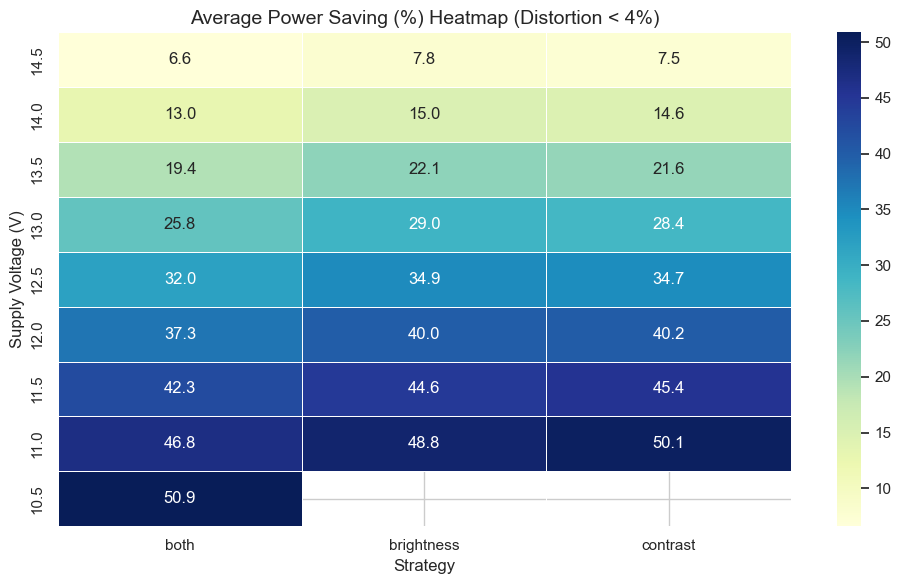

: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mtick
# ==========================================
# 0. Configuration & Loading
# ==========================================
csv_filename = os.path.join("lab2_results_output", "all_sim_records_limit_3.0.csv")
output_dir = "lab2_final_analysis"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Loading data: {csv_filename} ...")
try:
    df = pd.read_csv(csv_filename)
    print(f"Data loading complete, {len(df)} records in total.")
except FileNotFoundError:
    print(f"Error: File {csv_filename} not found. Please check the path or run the simulation script first.")
    exit()

# Set plotting style
sns.set(style="whitegrid")

# Filter the focus area for plotting (0-4%)
focus_limit = 4.0
df_focus = df[df['Distortion(%)'] <= focus_limit].copy()

# ==========================================
# 1. Trade-off Analysis Chart (Strategy Trends)
# ==========================================
print("\n--- 1. Generating Trade-off Analysis Chart (Strategy Trends + Statistics Table) ---")

# --- Preparation: Statistical data by gradient ---
bins = [0, 1, 2, 3, 4]
bin_labels = ['0-1%', '1-2%', '2-3%', '3-4%']
df_focus['Dist_Range'] = pd.cut(df_focus['Distortion(%)'], bins=bins, labels=bin_labels, include_lowest=True)

# Generate cross-tabulation
count_table = pd.crosstab(df_focus['Strategy'], df_focus['Dist_Range'])

# Construct statistical text box string
# 1. Calculate the total number of each strategy
total_counts = df_focus['Strategy'].value_counts()
t_both = total_counts.get('both', 0)
t_bri  = total_counts.get('brightness', 0)
t_con  = total_counts.get('contrast', 0)

# 2. Fill gradient data for each row
stats_str = "Sample Counts per Range:\n"
stats_str += f"{'Range':<6} {'Both':<5} {'Bri.':<5} {'Con.':<5}\n"
stats_str += "-"*26 + "\n"
for label in bin_labels:
    n_both = count_table.loc['both', label] if 'both' in count_table.index else 0
    n_bri  = count_table.loc['brightness', label] if 'brightness' in count_table.index else 0
    n_con  = count_table.loc['contrast', label] if 'contrast' in count_table.index else 0
    stats_str += f"{label:<6} {n_both:<5} {n_bri:<5} {n_con:<5}\n"

# 3. Add Total row
stats_str += "-"*26 + "\n"
stats_str += f"{'Total':<6} {t_both:<5} {t_bri:<5} {t_con:<5}"


# -------------------------------------------------------
# Chart A: Pure Strategy Trend Chart (Strategy Trends)
# -------------------------------------------------------
plt.figure(figsize=(11, 7.5))

# Construct legend labels
def get_label(strat):
    return f"{strat} (n={total_counts.get(strat, 0)})"
df_focus['Strategy_Label'] = df_focus['Strategy'].apply(get_label)

sns.lineplot(
    data=df_focus, 
    x='Distortion(%)', 
    y='Power_Saving(%)', 
    hue='Strategy_Label', 
    style='Strategy_Label', 
    markers=True, 
    dashes=False,
    err_style="bars", 
    ci=95,
    linewidth=2.5
)

# Add statistical text box
props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='#aaaaaa')
plt.gca().text(0.02, 0.98, stats_str, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', bbox=props, fontfamily='monospace')

plt.title(f'Trade-off Analysis: Strategy Trends (Focus 0-{focus_limit}%)', fontsize=14)
plt.xlabel('Distortion (%)', fontsize=12)
plt.ylabel('Power Saving (%)', fontsize=12)
plt.xlim(0, 4)
plt.legend(title='Strategy', loc='lower right')
plt.tight_layout()

save_path_strat = os.path.join(output_dir, "tradeoff_1_strategy_trends.png")
plt.savefig(save_path_strat, dpi=300)
plt.close()
print(f"  -> Strategy trend chart saved: {save_path_strat}")

# ==========================================
# 2. Trade-off Analysis Chart (Voltage Scatter)
# ==========================================
print("\n--- 2. Generating Trade-off Analysis Chart (Voltage Scatter) ---")

plt.figure(figsize=(11, 7.5))

# Process voltage legend: convert to string, sort, and force discrete display
df_focus['Voltage_Str'] = df_focus['Voltage'].apply(lambda x: f"{x:.1f}")
# Sort legends in descending order by numerical value (14.5 -> 8.5)
voltage_order = sorted(df_focus['Voltage_Str'].unique(), key=lambda x: float(x), reverse=True)

# Pure voltage color mapping (remove size parameter to eliminate gray dot interference)
sns.scatterplot(
    data=df_focus,
    x='Distortion(%)',
    y='Power_Saving(%)',
    hue='Voltage_Str',      # Color map voltage
    hue_order=voltage_order,
    palette='viridis_r',    # Discrete palette
    s=60,                   # Fixed point size
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)

plt.title(f'Trade-off Analysis: Voltage Distribution (Focus 0-{focus_limit}%)', fontsize=14)
plt.xlabel('Distortion (%)', fontsize=12)
plt.ylabel('Power Saving (%)', fontsize=12)
plt.xlim(0, 4)
plt.legend(title='Voltage (V)', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()

save_path_volt = os.path.join(output_dir, "tradeoff_2_voltage_scatter.png")
plt.savefig(save_path_volt, dpi=300)
plt.close()
print(f"  -> Voltage scatter plot saved: {save_path_volt}")


# ==========================================
# 4. Auxiliary Analysis: Histogram & Constraint Optimization Table
# ==========================================
print("\n--- 4. Generating auxiliary analysis data ---")

# Strategy distribution histogram
plt.figure(figsize=(9, 6))
sns.histplot(data=df_focus, x='Distortion(%)', hue='Strategy', multiple='dodge', bins=bins, shrink=0.8, palette='viridis')
plt.title('Density of Valid Configurations by Distortion Range')
plt.xticks([0.5, 1.5, 2.5, 3.5], bin_labels)
plt.savefig(os.path.join(output_dir, "strategy_density_histogram.png"))
plt.close()

# -------------------------------------------------------
# [New Feature] Print Constraint Optimization Table Log
# -------------------------------------------------------
thresholds = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
optimization_results = []
for t in thresholds:
    valid_records = df[df['Distortion(%)'] <= t]
    if not valid_records.empty:
        # Find the maximum power saving value for each image under the current constraint
        best_per_image = valid_records.groupby('Image')['Power_Saving(%)'].max()
        # Fill in missing images (if no configuration meets the constraints, record as 0)
        best_per_image = best_per_image.reindex(df['Image'].unique(), fill_value=0)
        
        optimization_results.append({
            'Distortion_Constraint(%)': t,
            'Average_Max_Saving(%)': round(best_per_image.mean(), 4),
            'Min_Saving_Achieved(%)': round(best_per_image.min(), 2),
            'Max_Saving_Achieved(%)': round(best_per_image.max(), 2)
        })

opt_df = pd.DataFrame(optimization_results)
opt_csv_path = os.path.join(output_dir, "optimization_under_constraints.csv")
opt_df.to_csv(opt_csv_path, index=False)

# Print in console, restore original functionality
print("\n--- 2. Executing Constraint Optimization Analysis (Max Saving under Constraints) ---")
print(opt_df.to_string()) # to_string() ensures the complete table format is printed
print("-" * 60)

print(f"\n[All Done] Analysis complete. Results saved in {output_dir}")

# ==========================================
# New Feature: Generate "Best Strategy Distribution Chart" (Winning Rate)
# ==========================================
print("\n--- Generating Best Strategy Distribution Chart ---")

# 1. Filter data that meets the constraints
constraint_val = 1.0
df_valid = df[df['Distortion(%)'] <= constraint_val].copy()

if not df_valid.empty:
    # 2. For each image and each voltage, find the strategy with the most power savings
    # idxmax returns the index corresponding to the maximum value
    idx_best = df_valid.groupby(['Image', 'Voltage'])['Power_Saving(%)'].idxmax()
    df_winners = df_valid.loc[idx_best]

    # 3. Count the winning times of each strategy at each voltage
    win_counts = pd.crosstab(df_winners['Voltage'], df_winners['Strategy'])
    
    # 4. Convert to percentages
    win_pct = win_counts.div(win_counts.sum(axis=1), axis=0) * 100
    
    # Ensure voltage is sorted in descending order (14.5 -> 9.0) to match intuition
    win_pct = win_pct.sort_index(ascending=False)

    # 5. Plotting: 100% stacked bar chart
    ax = win_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', alpha=0.85)
    
    plt.title(f'Preferred Strategy Distribution by Voltage (Constraint < {constraint_val}%)', fontsize=14)
    plt.xlabel('Supply Voltage (V)', fontsize=12)
    plt.ylabel('Percentage of Images (%)', fontsize=12)
    plt.legend(title='Best Strategy', bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # Format Y-axis as percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Annotate values on bars
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f%%', label_type='center', color='white', fontsize=9, fontweight='bold')

    plt.tight_layout()
    save_path_dist = os.path.join(output_dir, "best_strategy_distribution.png")
    plt.savefig(save_path_dist, dpi=300)
    plt.close()
    print(f"  -> Best strategy distribution chart saved: {save_path_dist}")
    
    # Print data table for analysis
    print("\n[Console Output] Best strategy percentage by voltage (%):")
    print(win_pct.round(1))

else:
    print("No data meets the distortion constraints, cannot generate distribution chart.")

# Generate "Average Power Saving Rate" Heatmap
print("\n--- Generating intuitive heatmap ---")
plt.figure(figsize=(10, 6))

# 1. Data preparation: Calculate average power savings for each voltage and each strategy
# Keep only data with distortion < 3% (Note: variable here says 4.0 matching your original code)
valid_data = df[df['Distortion(%)'] <= 4.0]
pivot_table = valid_data.pivot_table(index='Voltage', columns='Strategy', values='Power_Saving(%)', aggfunc='mean')

# Sort by voltage from high to low
pivot_table = pivot_table.sort_index(ascending=False)

# 2. Draw plot
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)

plt.title('Average Power Saving (%) Heatmap (Distortion < 4%)', fontsize=14)
plt.ylabel('Supply Voltage (V)')
plt.xlabel('Strategy')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "simple_heatmap.png"))
plt.show()

In [24]:
def estimate_power_part1(img):
    return compute_power(img) 

In [25]:
def apply_hungry_blue(img, k):
    img_mod = img.astype(np.int16) #default uint8[0,255] underflow
    img_mod[:, :, 2] = img_mod[:, :, 2] - k
    img_mod = np.clip(img_mod, 0, 255) 
    return img_mod.astype(np.uint8)

In [4]:
def load_images_from_folder(folder_path, limit=50):
    images_list = []
    
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
    
    try:
        filenames = os.listdir(folder_path)
    except FileNotFoundError:
        print(f"Error: Folder '{folder_path}' not found")
        return []

    filenames.sort()

    count = 0
    print(f"Loading images from {folder_path}...")

    for filename in filenames:
        if count >= limit:
            break
        
        if filename.lower().endswith(valid_extensions):
            file_path = os.path.join(folder_path, filename)
            
            try:
                with Image.open(file_path) as img:
                    img_rgb = img.convert('RGB')
                    
                    img_array = np.array(img_rgb)
                    
                    images_list.append(img_array)
                    count += 1
                    
            except Exception as e:
                print(f"Failed to load image {filename}: {e}")

    print(f"Successfully loaded {len(images_list)} images.")
    return images_list

In [5]:
my_folder_path="./test_images"
images = load_images_from_folder(my_folder_path, limit=50)

Loading images from ./test_images...
Successfully loaded 50 images.
